In [329]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl

In [330]:
mpl.style.use('seaborn-darkgrid')
pd.set_option('Display.max_row', 500)

In [331]:
restaurants = pd.read_csv('zomato_restaurants_lisbon')
restaurants_types = pd.read_csv('restaurants_types_table')
restaurants_cuisines = pd.read_csv('restaurants_cuisines_table')
restaurants_infos = pd.read_csv('restaurants_infos_table')

In [332]:
restaurants

,name,neighborhood,avg_rating,#_of_ratings,avg_cost,cash_cards?,avg_cost_2
0,Geladaria Freddo,Corroios,3.6,27,8 € for two people (approx.),Cash and Cards accepted,8
1,Restaurante Baía,Cascais Centro,3.8,24,50 € for two people (approx.),Debit Cards accepted,50
2,Menos Um,Venteira,2.9,66,20 € for two people (approx.),Debit Cards accepted,20
3,Real Cake,Loures Centro,2.8,61,15 € for two people (approx.),Debit Cards accepted,15
4,Bolos Caseiros,Penha de França,3.5,7,15 € for two people (approx.),Cash only,15
...,...,...,...,...,...,...,...
12415,Inevitável - Vila Galé Collection Palácio dos ...,Paço de Arcos,4.1,37,100 € for two people (approx.),Cash and Cards accepted,100
12416,Flor de Lis - EPIC SANA Lisboa Hotel,Rato,4.4,98,100 € for two people (approx.),Cash and Cards accepted,100
12417,Midori - Penha Longa Resort,Alcabideche,4.6,246,220 € for two people (approx.),Cash and Cards accepted,220
12418,Tágide,Chiado,4.2,235,65 € for two people (approx.),Cash and Cards accepted,65


<function matplotlib.pyplot.show(*args, **kw)>

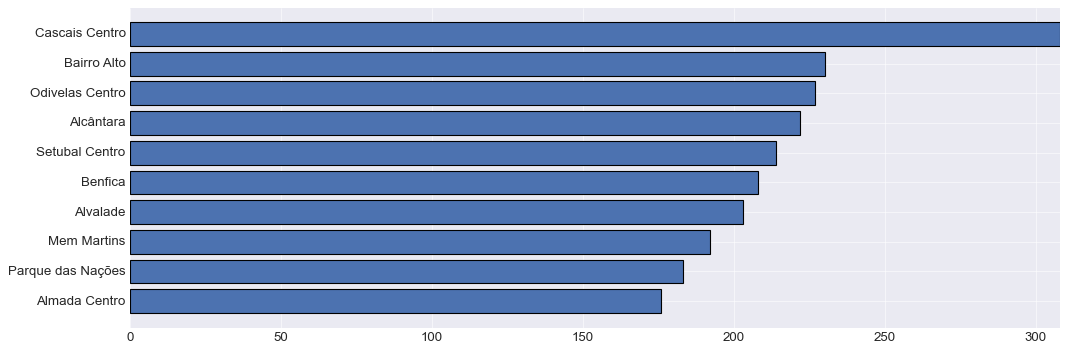

In [333]:
rest_counts = restaurants.groupby('neighborhood')['name'].count().sort_values(ascending=False)
plt.figure(figsize=[15,5])
plt.barh(rest_counts[:10].index, rest_counts[:10])
plt.margins(y=0.05)
plt.gca().invert_yaxis()
plt.show

In [334]:
rest_counts

neighborhood
Cascais Centro                  308
Bairro Alto                     230
Odivelas Centro                 227
Alcântara                       222
Setubal Centro                  214
Benfica                         208
Alvalade                        203
Mem Martins                     192
Parque das Nações               183
Almada Centro                   176
Arroios                         172
Oeiras e São Julião da Barra    172
São Domingos de Benfica         170
Torres Vedras Centro            167
Marquês de Pombal               166
Saldanha                        162
Sintra Centro                   162
Costa da Caparica               159
Cais do Sodré                   159
Ericeira                        158
Barreiro Centro                 156
Baixa                           154
Algés                           153
Queluz                          148
Alfama                          144
Carcavelos                      142
Campo de Ourique                141
Cacém          

In [335]:
# Transform the '-' values of avg_rating in zeroes
rest_tables = [restaurants, restaurants_types, restaurants_cuisines, restaurants_infos]
for table in rest_tables:
    a = table[table['avg_rating'] == '-']
    for index in a.index:
        table.loc[index, 'avg_rating'] = 0

In [336]:
# Take off the comma from values in #_of_ratings with more than 3 digits
for table in rest_tables:
    table['#_of_ratings'] = table['#_of_ratings'].str.replace(',', '')

In [337]:
# Assign numerical types to avg_rating and #_of_ratings
for table in rest_tables:
    table[['avg_rating', '#_of_ratings']] = table[['avg_rating', '#_of_ratings']].apply(pd.to_numeric)

In [338]:
neigh_avg_rating = restaurants.groupby('neighborhood').agg({'avg_rating' : ['mean', 'count'], '#_of_ratings' : 'sum'}).sort_values(by=('avg_rating', 'mean'), ascending=False).round(2)
neigh_avg_rating

avg_rating       #_of_ratings
                                   mean count          sum
neighborhood                                              
Rosário                            4.00     2          134
Campelos-Outeiro da Cabeça         4.00     1           77
Azueira-Sobral da Abelheira        4.00     2           46
São Francisco                      3.77     3          115
A-dos-Cunhados                     3.75     4          113
Enxara do Bispo                    3.75     2           53
Guincho                            3.69    54         6087
Príncipe Real                      3.66    89        24135
Cheleiros-Igreja Nova              3.65     2           82
Madragoa                           3.56    29         3895
Chiado                             3.55   134        27469
São Bento                          3.51    69         7287
Lapa-Estrela                       3.47    92         7912
Amoreiras                          3.43    31         2646
Rato                               3.42    82         9658
Cais do Sodré                      3.41   159        16467
Azóia                              3.40     3           19
Praça de Espanha                   3.40   115        16605
Avenida da Liberdade               3.38   139        16691
Quinta do Anjo                     3.38    14          310
Bica                               3.37    43         5003
Campo de Ourique                   3.36   141        15050
Campo Pequeno                      3.35   127        16515
São Pedro do Estoril               3.34    16         2486
Carcavelos                         3.34   142        13717
Sé                                 3.33    58         4898
Santos                             3.31    76        10659
Ventosa                            3.30     1           14
Saldanha                           3.28   162        25195
Restelo                            3.28    71         5721
Parque das Nações                  3.28   183        33647
Alcochete Centro                   3.27    34         1576
Ericeira                           3.26   158        10139
Graça                              3.26    85         4088
Belém                              3.26    99        12361
Baixa                              3.26   154        17321
Mouraria                           3.26   120        12688
Arroios                            3.25   172        14773
Areeiro                            3.24   133         7625
Bairro Alto                        3.24   230        14859
Rossio                             3.22    77         5124
Lumiar                             3.21    98         6475
Santo Estevão das Galés            3.20     1           12
Alcântara                          3.19   222        21192
Alfragide                          3.17    39         2852
Parede                             3.17   103         4442
Carnaxide                          3.17    63         4003
Telheiras                          3.17    91         8021
Alvalade                           3.16   203        21990
Estoril                            3.15   106         4595
Bucelas                            3.14     7          219
Pena                               3.13    97         5951
Carnide                            3.13    45         5980
Massamá                            3.12   106         4648
São Domingos de Benfica            3.12   170         7319
Costa da Caparica                  3.12   159         8754
Intendente                         3.11     9          304
Colares                            3.11    86         5712
Alfama                             3.07   144         3384
Entrecampos                        3.06    98         4204
Cascais Centro                     3.03   308        16011
Palmela Centro                     3.03    26         1101
Campolide                          3.02   121         7613
Malveira                           3.02    17         1139
Abrunheira                         3.01    35         1656
Sintra Centro    

<function matplotlib.pyplot.show(*args, **kw)>

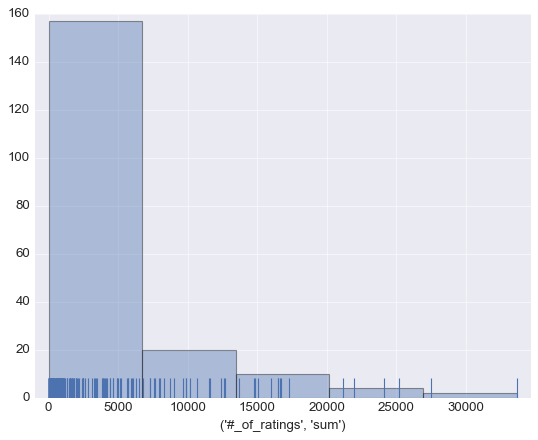

In [339]:
sns.distplot(neigh_avg_rating[('#_of_ratings', 'sum')], kde=False, bins=5, rug=True)
plt.margins(x=0.03)
plt.show

In [340]:
cutoffs = [-1,4806,9613,14420,19226,33647]
neigh_avg_rating['bin'] = pd.cut(neigh_avg_rating[('#_of_ratings', 'sum')], cutoffs)#, labels=['bin1', 'bin2', 'bin3', 'bin4'])
neigh_avg_rating.sort_values(by=['bin', ('avg_rating', 'mean')], ascending=[True, False])

avg_rating       #_of_ratings             bin
                                   mean count          sum                
neighborhood                                                              
Rosário                            4.00     2          134      (-1, 4806]
Campelos-Outeiro da Cabeça         4.00     1           77      (-1, 4806]
Azueira-Sobral da Abelheira        4.00     2           46      (-1, 4806]
São Francisco                      3.77     3          115      (-1, 4806]
A-dos-Cunhados                     3.75     4          113      (-1, 4806]
Enxara do Bispo                    3.75     2           53      (-1, 4806]
Cheleiros-Igreja Nova              3.65     2           82      (-1, 4806]
Madragoa                           3.56    29         3895      (-1, 4806]
Amoreiras                          3.43    31         2646      (-1, 4806]
Azóia                              3.40     3           19      (-1, 4806]
Quinta do Anjo                     3.38    14          310      (-1, 4806]
São Pedro do Estoril               3.34    16         2486      (-1, 4806]
Ventosa                            3.30     1           14      (-1, 4806]
Alcochete Centro                   3.27    34         1576      (-1, 4806]
Graça                              3.26    85         4088      (-1, 4806]
Santo Estevão das Galés            3.20     1           12      (-1, 4806]
Alfragide                          3.17    39         2852      (-1, 4806]
Parede                             3.17   103         4442      (-1, 4806]
Carnaxide                          3.17    63         4003      (-1, 4806]
Estoril                            3.15   106         4595      (-1, 4806]
Bucelas                            3.14     7          219      (-1, 4806]
Massamá                            3.12   106         4648      (-1, 4806]
Intendente                         3.11     9          304      (-1, 4806]
Alfama                             3.07   144         3384      (-1, 4806]
Entrecampos                        3.06    98         4204      (-1, 4806]
Palmela Centro                     3.03    26         1101      (-1, 4806]
Malveira                           3.02    17         1139      (-1, 4806]
Abrunheira                         3.01    35         1656      (-1, 4806]
Birre                              2.97    22          972      (-1, 4806]
Venda do Pinheiro                  2.95    14          324      (-1, 4806]
Sarilhos Grandes                   2.94    10          690      (-1, 4806]
São João do Estoril                2.94    51         1123      (-1, 4806]
Malveira da Serra                  2.89    15          430      (-1, 4806]
Alcabideche                        2.89    90         3445      (-1, 4806]
Anjos                              2.89    75         4114      (-1, 4806]
Milharado                          2.85     4          186      (-1, 4806]
Belas                              2.85    58          754      (-1, 4806]
Aldeia do Meco                     2.84    34         1020      (-1, 4806]
Campo Grande                       2.83    84         3865      (-1, 4806]
Moscavide                          2.81    86         1987      (-1, 4806]
Brejoeira                          2.80     1           13      (-1, 4806]
Sobreda                            2.79    18          645      (-1, 4806]
Castelo                            2.78    36         1791      (-1, 4806]
Arrábida                           2.77    11          232      (-1, 4806]
Alverca do Ribatejo                2.76    52         2196      (-1, 4806]
São Sebastião                      2.75    50         1512      (-1, 4806]
Cajados                            2.73     3          199      (-1, 4806]
São Domingos de Rana               2.72   104         2097      (-1, 4806]
Feijó                              2.72    32          816      (-1, 4806]
Ajuda                              2.72    78         1299      (-1, 4806]
Mem Martins                        2.71   192         

In [341]:
restaurants_types

,name,neighborhood,avg_rating,#_of_ratings,avg_cost,avg_cost_2,cash_cards?,variable,value
0,Geladaria Freddo,Corroios,3.6,27,8 € for two people (approx.),8,Cash and Cards accepted,type1,Ice-cream Shop
1,Restaurante Baía,Cascais Centro,3.8,24,50 € for two people (approx.),50,Debit Cards accepted,type1,Fine Dining
2,Menos Um,Venteira,2.9,66,20 € for two people (approx.),20,Debit Cards accepted,type1,Casual Dining
3,Real Cake,Loures Centro,2.8,61,15 € for two people (approx.),15,Debit Cards accepted,type1,Snack Bar
4,Bolos Caseiros,Penha de França,3.5,7,15 € for two people (approx.),15,Cash only,type1,Snack Bar
...,...,...,...,...,...,...,...,...,...
13568,Fonte dos Arcos,Oeiras e São Julião da Barra,0.0,0,7 € for two people (approx.),7,Cash and Debit Cards accepted,type2,Snack Bar
13569,Via Láctea,São Brás,3.7,16,30 € for two people (approx.),30,Cash and Debit Cards accepted,type2,Bar
13570,Sacramento,Chiado,4.5,794,50 € for two people (approx.),50,Cash and Cards accepted,type2,Bar
13571,Gambrinus,Rossio,4.6,388,110 € for two people (approx.),110,Cash and Cards accepted,type2,Bar


In [342]:
a = restaurants_types[restaurants_types['value'] == 'Fine Dining']
a.groupby('neighborhood')['value'].agg(['count', lambda x : x.count()/len(a)*100]).sort_values(by='count', ascending=False).round(2).head(3)

,count,<lambda_0>
neighborhood,,
Guincho,27,9.85
Cascais Centro,16,5.84
Avenida da Liberdade,13,4.74


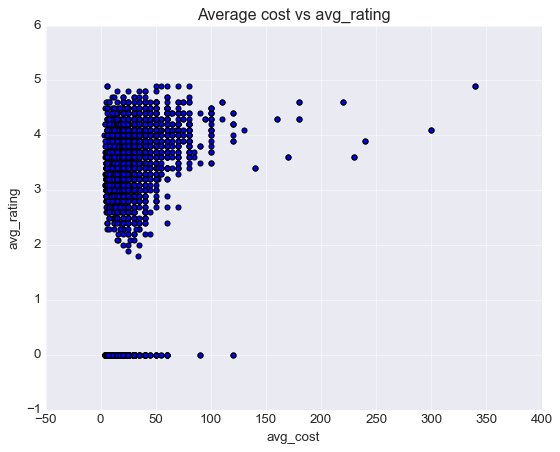

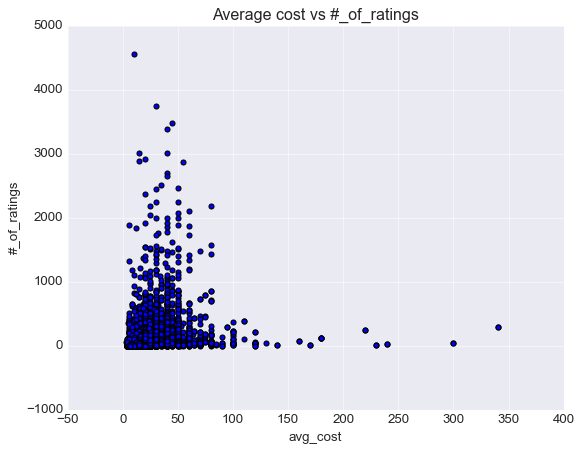

In [343]:
cols=['avg_rating', '#_of_ratings']
for col in cols:
    plt.figure()
    plt.scatter(restaurants['avg_cost_2'], restaurants[col])
    plt.title('Average cost vs ' + col)
    plt.xlabel('avg_cost')
    plt.ylabel(col)
    plt.show

In [344]:
# Get the indexes of all non-fine dinig restaurants
b = restaurants_types[restaurants_types['value'].ne('Fine Dining')].index
c = restaurants_cuisines[restaurants_cuisines.index.isin(b)]
cost_cuisine = c.groupby('value')['avg_cost_2'].mean().sort_values(ascending=False).round(2)
cost_cuisine

value
Russian              53.00
Author               46.79
Peruvian             46.00
Fusion               40.88
Korean               39.17
French               38.50
Contemporary         38.25
Thai                 38.12
Mediterranean        37.78
Seafood              37.03
Spanish              36.67
International        35.14
Caribbean            35.00
Fondue               34.80
Austrian             34.00
Fresh Fish           33.84
Japanese             33.42
Sushi                33.19
Steak                32.79
Cuban                30.00
Mineira              30.00
British              30.00
Tibetan              30.00
Alentejana           29.59
Mozambican           29.17
Mexican              29.12
Italian              28.86
Angolan              28.33
Lebanese             28.00
Goan                 27.80
Tapas                27.25
Greek                27.00
Vietnamese           26.00
Ramen                25.83
Argentine            25.64
Minhota              25.00
Israeli              2

<function matplotlib.pyplot.show(*args, **kw)>

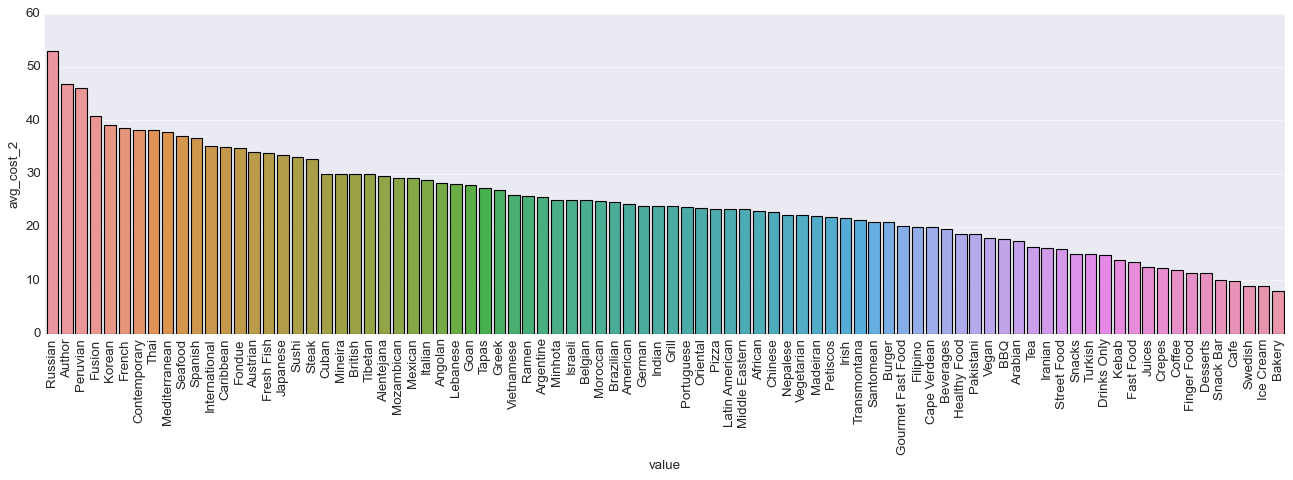

In [345]:
plt.figure(figsize=[20,5])
sns.barplot(cost_cuisine.index, cost_cuisine)
plt.xticks(rotation='vertical')
plt.show

In [346]:
d = restaurants_types[restaurants_types['value'].eq('Fine Dining')].index

In [347]:
e = restaurants_cuisines[restaurants_cuisines.index.isin(d)]
cost_fine_cuisine = e.groupby('value')['avg_cost_2'].mean().sort_values(ascending=False).round(2)
cost_fine_cuisine

value
Spanish          140.00
Author           127.88
International    101.88
Sushi            100.00
Japanese          92.50
Oriental          90.00
Mediterranean     81.00
Argentine         80.00
Contemporary      78.29
Seafood           76.90
Chinese           75.00
Mozambican        75.00
Portuguese        71.72
Petiscos          65.00
Italian           63.00
Beverages         60.00
Fresh Fish        57.50
Fusion            57.50
Alentejana        50.00
Name: avg_cost_2, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

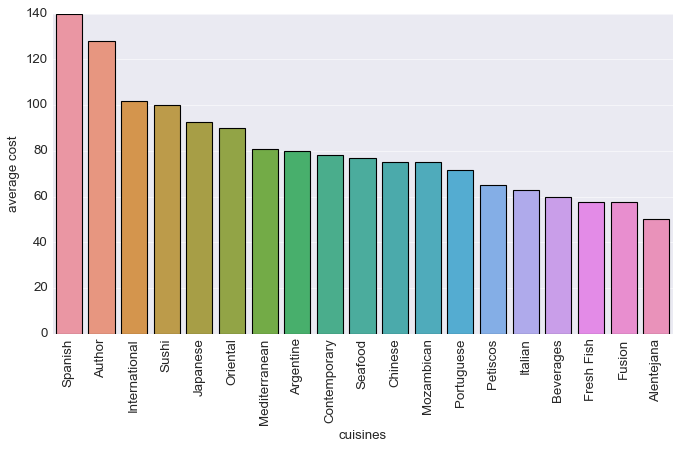

In [348]:
plt.figure(figsize=[10,5])
sns.barplot(cost_fine_cuisine.index, cost_fine_cuisine)
plt.xticks(rotation='vertical')
plt.xlabel('cuisines')
plt.ylabel('average cost')
plt.show

In [352]:
avg_rating_cuisine = restaurants_cuisines.groupby('value')['avg_rating'].mean().sort_values(ascending=False)

<function matplotlib.pyplot.show(*args, **kw)>

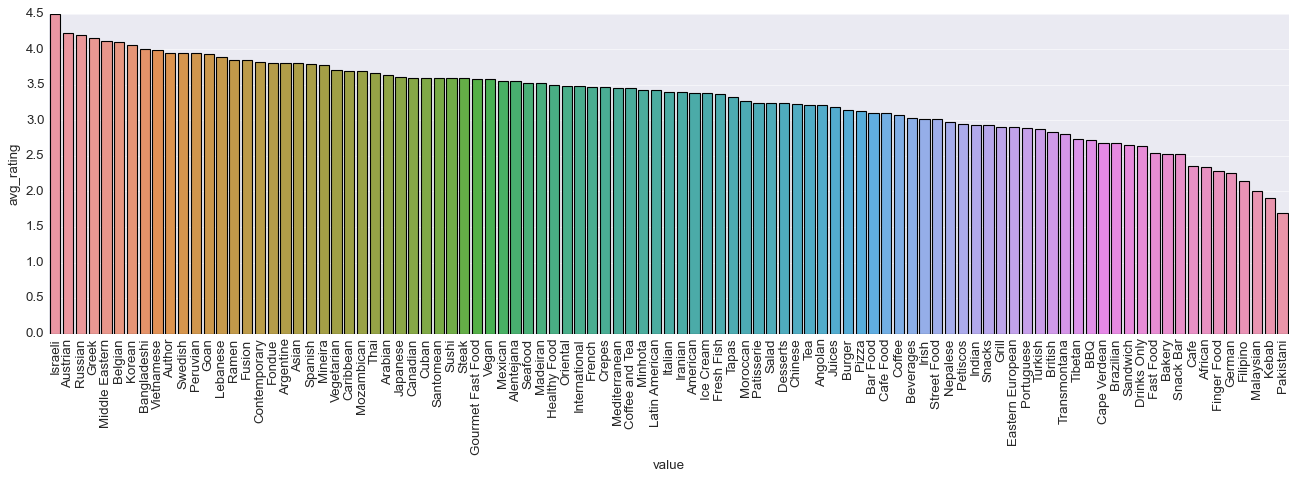

In [353]:
plt.figure(figsize=[20,5])
sns.barplot(avg_rating_cuisine.index, avg_rating_cuisine)
plt.xticks(rotation='vertical')
plt.show

In [350]:
rest_infos = restaurants_infos['value'].value_counts()
rest_infos

Indoor Seating                     11339
Full Bar Available                 10828
Wifi                                7847
Takeaway Available                  7483
Outdoor Seating                     6099
Wine By Glass                       5634
Breakfast                           4900
Sports TV                           4623
Lunch Menu                          2782
Table booking recommended           1830
Group Meal                          1512
Vegetarian Friendly                 1369
Nightlife                           1055
Desserts and Bakes                   949
Smoking Area                         844
Serves Cocktails                     551
Wine and Beer                        458
Craft Beer                           383
Vegan Options                        377
Live Music                           353
Kid Friendly                         309
Beer                                 309
Pet Friendly                         308
Buffet                               283
Home Delivery   